In [9]:
mydata = read.csv("Weather_Russia.csv",sep = ";") 

myts <- ts(mydata['Monthly'], start=c(2008, 5), end=c(2016, 1), frequency=12) 

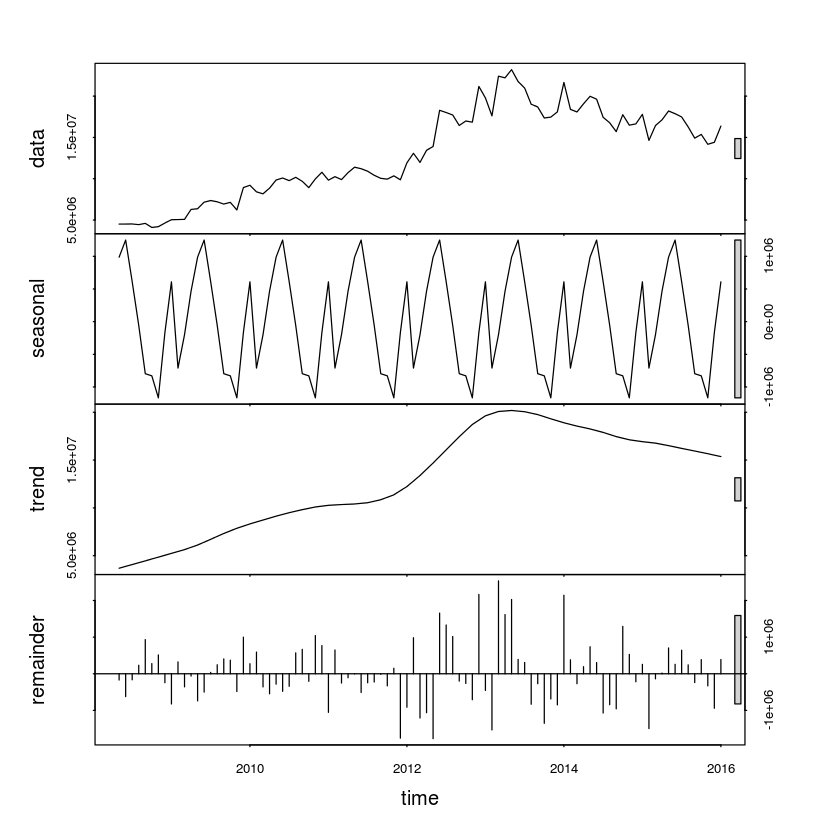

In [10]:
fit <- stl(myts, s.window="period")
plot(fit)


In [11]:
# simple exponential - models level
fit <- HoltWinters(myts, beta=FALSE, gamma=FALSE)
# double exponential - models level and trend
fit <- HoltWinters(myts, gamma=FALSE)
# triple exponential - models level, trend, and seasonal components
fit <- HoltWinters(myts)

# predictive accuracy
library(forecast)
accuracy(fit)

# predict next three future values
library(forecast)
forecast(fit, 24)

ERROR: Error in accuracy(fit): First argument should be a forecast object or a time series.


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Feb 2016       14515953 12864255 16167652 11989898 17042008
Mar 2016       14950039 13006878 16893199 11978231 17921846
Apr 2016       15539026 13315818 17762234 12138922 18939130
May 2016       15824379 13327409 18321349 12005593 19643165
Jun 2016       15917538 13150070 18685007 11685061 20150016
Jul 2016       15329405 12292775 18366036 10685279 19973531
Aug 2016       14730854 11425102 18036605  9675143 19786565
Sep 2016       14102545 10526809 17678281  8633929 19571161
Oct 2016       14271532 10424299 18118765  8387696 20155368
Nov 2016       13873476  9752755 17994198  7571376 20175577
Dec 2016       14551058 10154500 18947616  7827103 21275013
Jan 2017       15012757 10337746 19687767  7862945 22162568
Feb 2017       13614047  8600141 18627954  5945940 21282155
Mar 2017       14048133  8753068 19343198  5950029 22146237
Apr 2017       14637120  9057513 20216727  6103848 23170393
May 2017       14922473  9054889 2079005

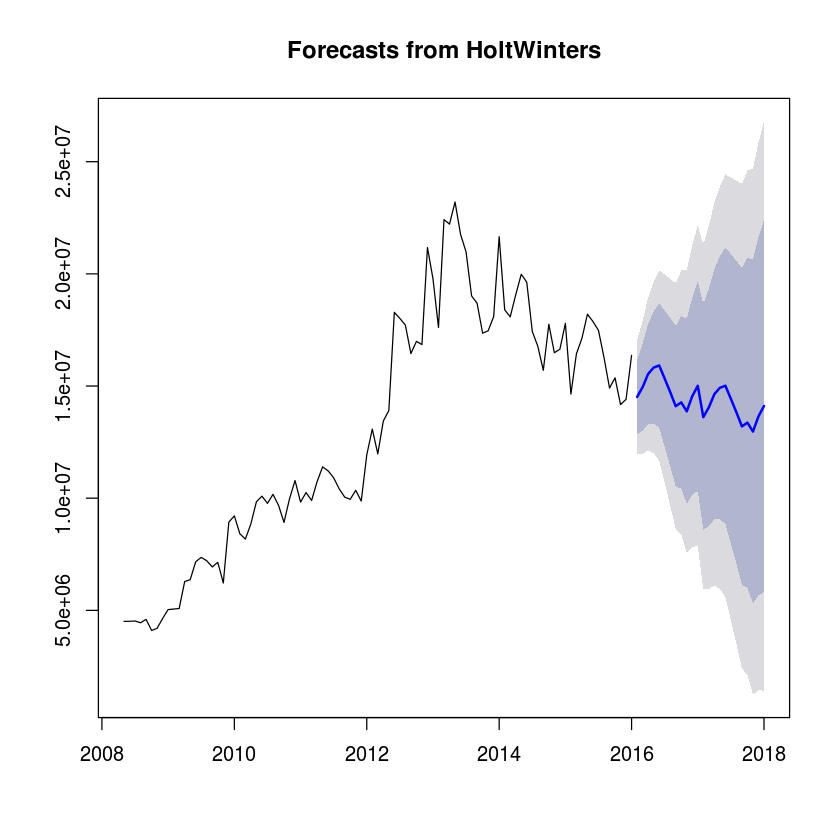

In [12]:
plot(forecast(fit, 24))

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,1.728292e+05,1.323260e+06,9.158689e+05,1.365863e+00,6.729985e+00,9.766229e-01,-1.445205e-02


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Feb 2016       15995972 14290955 17700990 13388373 18603571
Mar 2016       15895467 13727288 18063645 12579524 19211409
Apr 2016       15868328 13370293 18366362 12047914 19688742
May 2016       15861000 13083606 18638393 11613343 20108656
Jun 2016       15859021 12830783 18887259 11227731 20490311
Jul 2016       15858486 12599369 19117604 10874096 20842877
Aug 2016       15858342 12383834 19332850 10544541 21172143
Sep 2016       15858303 12181046 19535561 10234423 21482183
Oct 2016       15858293 11988907 19727678  9940578 21776008
Nov 2016       15858290 11805877 19910702  9660660 22055920
Dec 2016       15858289 11630767 20085811  9392853 22323725
Jan 2017       15858289 11462629 20253949  9135707 22580871
Feb 2017       15858289 11300689 20415889  8888041 22828537
Mar 2017       15858289 11144308 20572269  8648878 23067700
Apr 2017       15858289 10992952 20723625  8417398 23299179
May 2017       15858289 10846164 2087041

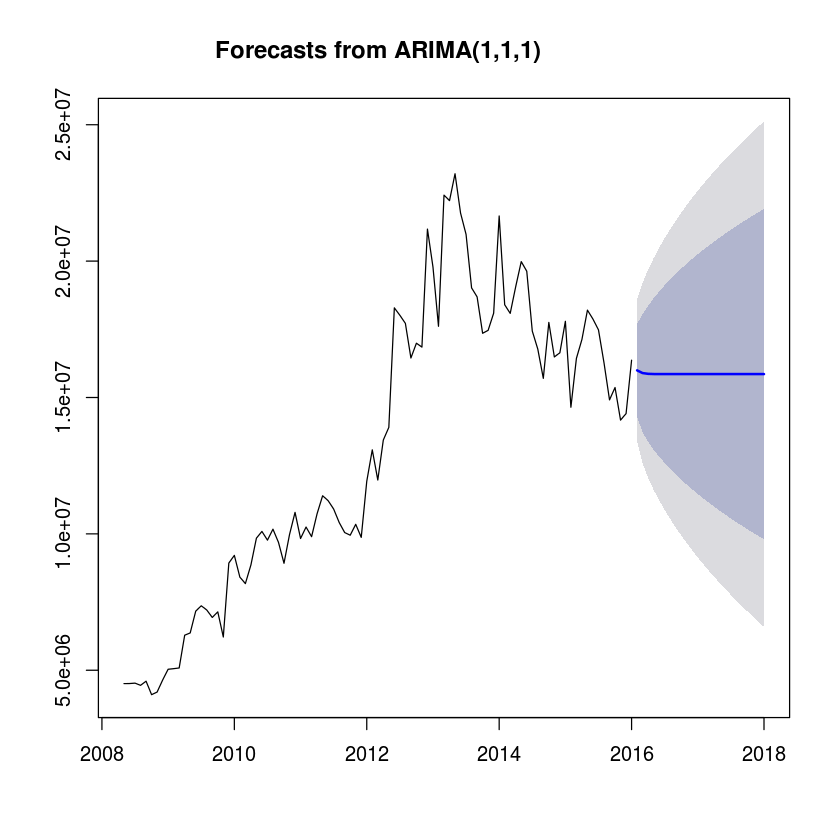

In [13]:
# fit an ARIMA model of order P, D, Q
fit <- arima(myts, order=c(1, 1, 1))

# predictive accuracy
library(forecast)
accuracy(fit)

# predict next 5 observations
library(forecast)
forecast(fit, 24)
plot(forecast(fit, 24))

         Point Forecast       Lo 80    Hi 80      Lo 95    Hi 95
Feb 2016       14760195 13366282.56 16154108 12628389.7 16892001
Mar 2016       14645498 13047016.06 16243981 12200830.7 17090166
Apr 2016       15495116 13514134.72 17476097 12465466.7 18524765
May 2016       16079445 13665593.36 18493296 12387777.7 19771111
Jun 2016       16381459 13505070.31 19257848 11982401.9 20780517
Jul 2016       15345660 12215866.47 18475453 10559053.9 20132266
Aug 2016       14422587 11033251.23 17811923  9239045.3 19606129
Sep 2016       13375144  9782744.36 16967544  7881042.8 18869245
Oct 2016       13061905  9083080.08 17040729  6976817.6 19146992
Nov 2016       12544008  8241204.58 16846811  5963438.2 19124577
Dec 2016       13556293  8353850.81 18758734  5599844.5 21512741
Jan 2017       14141897  8105445.90 20178348  4909941.8 23373852
Feb 2017       13045298  6884275.74 19206321  3622827.4 22467769
Mar 2017       12927291  6204344.91 19650237  2645432.2 23209150
Apr 2017       13659283  

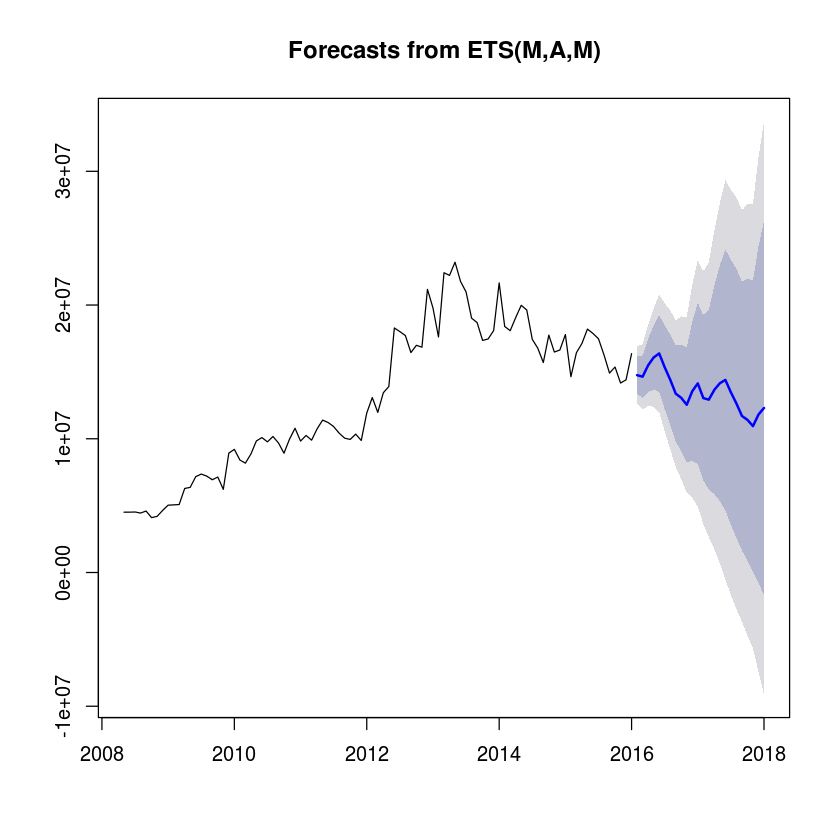

In [14]:
# Automated forecasting using an exponential model
fit <- ets(myts)
forecast(fit, 24)
plot(forecast(fit, 24))

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Feb 2016       16004780 14288048 17721511 13379265 18630294
Mar 2016       16072199 13858100 18286298 12686027 19458371
Apr 2016       16059691 13409025 18710357 12005847 20113535
May 2016       16062012 13042410 19081613 11443929 20680094
Jun 2016       16061581 12712574 19410588 10939717 21183445
Jul 2016       16061661 12413016 19710306 10481541 21641781
Aug 2016       16061646 12136144 19987149 10058108 22065184
Sep 2016       16061649 11877572 20245725  9662656 22460642
Oct 2016       16061648 11634073 20489224  9290256 22833041
Nov 2016       16061648 11403284 20720013  8937295 23186002
Dec 2016       16061648 11183402 20939895  8601014 23522283
Jan 2017       16061648 10973012 21150285  8279251 23844046
Feb 2017       16061648 10770982 21352315  7970272 24153025
Mar 2017       16061648 10576388 21546909  7672667 24450630
Apr 2017       16061648 10388465 21734832  7385263 24738034
May 2017       16061648 10206570 2191672

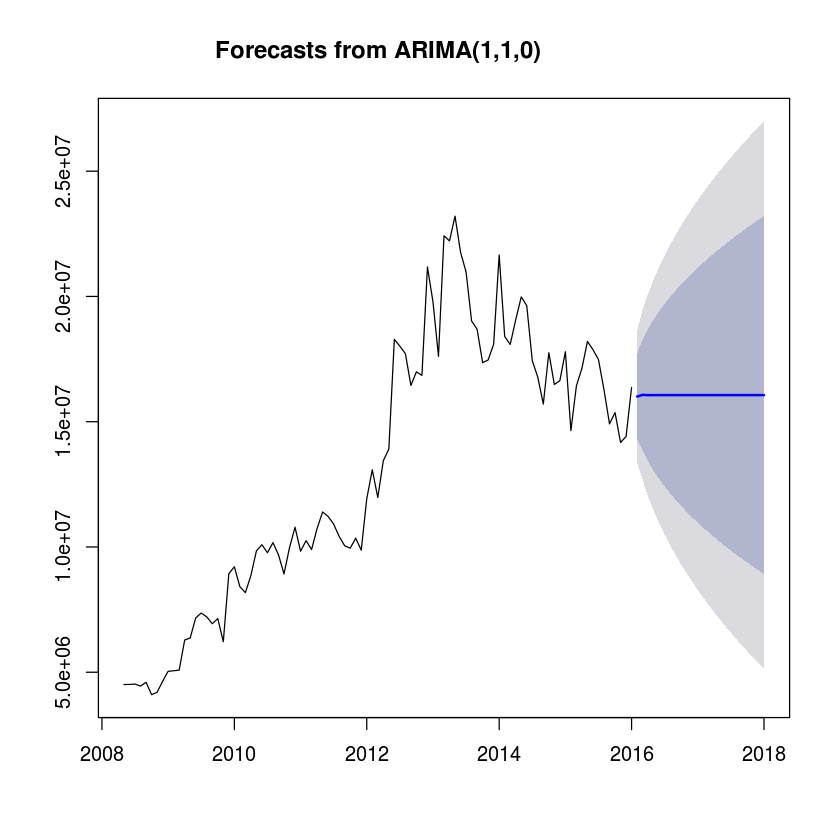

In [15]:
# Automated forecasting using an ARIMA model
fit <- auto.arima(myts)
forecast(fit, 24)
plot(forecast(fit, 24))